In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('./csv/diabetic_model.csv')

Considering only the living.

In [3]:
deceased = df[df['deceased']==1].index

In [4]:
df.shape[0]

98646

In [5]:
df.drop(deceased, axis=0, inplace=True)
df.index = list(range(df.shape[0]))

In [6]:
pd.DataFrame(df.groupby(['patient'])['condition'].unique())[:10]

,condition
patient,
0003d26b-8757-449d-a4d6-c6dbaa822426,[Prediabetes]
00156155-152c-4836-8902-cadb73995b17,"[Prediabetes, Coronary Heart Disease, Chronic ..."
001bbf9c-6b41-46d0-9e79-83cd34d053af,"[Hypertension, Prediabetes, Chronic sinusitis ..."
002008bb-1d9f-4662-91ce-29d12c562797,"[Chronic sinusitis (disorder), Hypertension, D..."
00210499-4972-4bd0-a21f-7325dc310058,"[Hypertension, Diabetes, Diabetic renal diseas..."
0024465e-b6af-4b19-9f47-71e10bc8b0e8,"[Hypertension, Prediabetes]"
002997d0-a2eb-4437-a172-c458fdbd5568,"[Hypertension, Prediabetes]"
002b8529-09f4-463f-8eb2-55142c703ed3,"[Hypertension, Diabetes]"
002e3634-e172-4fb0-8c3c-735dd7e3e650,[Neuropathy due to type 2 diabetes mellitus (d...


In [7]:
patient_conditions = \
[(pat, list(con)) 
 for pat,con in df.groupby('patient')['condition']
 .unique().to_dict()
 .items()]
patient_conditions = dict(patient_conditions)

Find the non-diabetic patients.

In [8]:
faux_diabetics = []
for pat in patient_conditions.keys():
    if not 'iabet' in ','.join(patient_conditions[pat]): # detect non diabetic condition records
        faux_diabetics.append(pat)


In [9]:
len(df['patient'].unique())

12479

Remove the non-diabetic patients.

In [10]:
faux_diabetics_dx = df[df['patient'].isin(faux_diabetics)].index

In [11]:
df.drop(faux_diabetics_dx, axis=0, inplace=True)
df.index = list(range(df.shape[0]))

Combine patients with only an initial diagnosis ensure each is only counted once.

In [12]:
# Update patient_conditions
patient_conditions = \
[(pat, list(con)) 
 for pat,con in df.groupby('patient')['condition']
 .unique().to_dict()
 .items()]
patient_conditions = dict(patient_conditions)

Plot some common conditions

/home/craig/anaconda3/envs/dsi/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


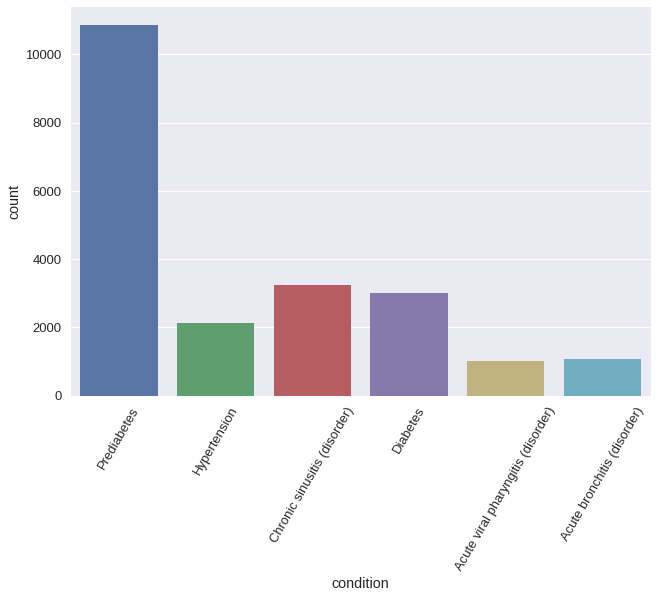

In [67]:
comm_cond = [condition for condition, count in dict(df['condition'].value_counts()).items() if count > 1000]

mask = df['condition'].isin(comm_cond)

sns.set_context(context='talk')
sns.countplot(x='condition', data=df[mask], orient="v") \
.set_xticklabels(rotation=60, labels=comm_cond)
plt.show()

In [68]:
dfmod['single_condition'].value_counts()

0    6813
1    4120
Name: single_condition, dtype: int64

In [69]:
dfmod.shape[0], df.shape[0]

(10933, 37976)

In [14]:
example = ['Calcium', 'Glucose', 'Sodium', 
           'Systolic Blood Pressure', 
           'Urea Nitrogen']

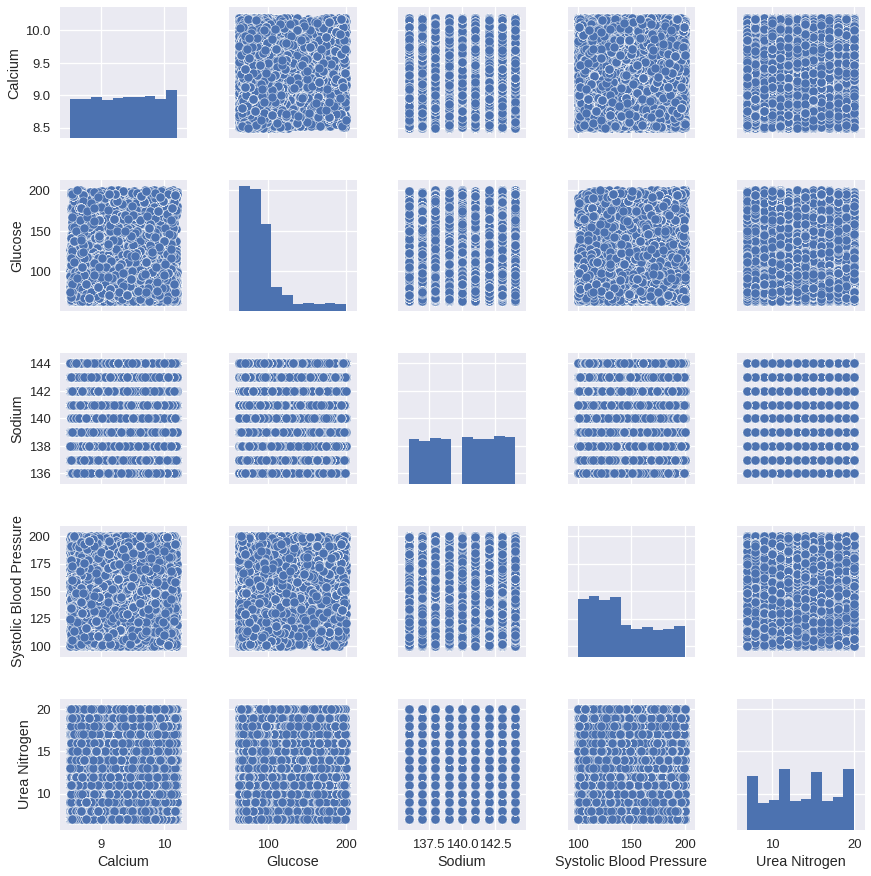

In [15]:
sns.pairplot(df[example])

In [16]:
single_condition = [pat for pat,conds in patient_conditions.items() if len(conds)==1]

compound_condition = [pat for pat,conds in patient_conditions.items() if len(conds)>1]

In [17]:
df['single_condition'] = df['patient'].map(lambda x: int(x in single_condition))

In [18]:
dfmod = df.sort_values(by='age', axis=0, ascending=False).groupby('patient').first()

In [21]:
dfmod.head()

,birthdate,marital,gender,Body Height,Body Mass Index,Body Weight,Calcium,Carbon Dioxide,Chloride,Diastolic Blood Pressure,Glucose,Potassium,Sodium,Systolic Blood Pressure,Urea Nitrogen,encounter,obs_date,enc_date,enc_code,enc_description,pro_date,pro_code,procedure,con_start,con_code,condition,deceased,persistent_condition,pro_reason_given,enc_reason_given,mcr_reported,fev_fvc_reported,glomerular_reported,triglyc_choles_reported,age,single_condition
patient,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0003d26b-8757-449d-a4d6-c6dbaa822426,1966-10-08,S,F,165.47,34.80,95.27,9.47,26.0,101.0,76.0,72.0,3.96,136.0,113.0,13.0,bfeca2bd-c617-4ae0-988c-7de28e8284a3,2011-03-12,2011-03-12,185349003,Outpatient Encounter,2011-03-12,428191000124101,Documentation of current medications,1999-09-15,15777000,Prediabetes,0,1,0,0,0,0,0,0,44,1
00156155-152c-4836-8902-cadb73995b17,1939-12-30,M,M,190.18,27.14,98.17,9.92,28.0,104.0,87.0,97.0,4.91,144.0,137.0,13.0,9fdb17ec-aff3-427a-a128-100a6095c1de,2010-07-28,2010-07-28,185349003,Outpatient Encounter,2010-07-28,428191000124101,Documentation of current medications,2004-05-20,53741008,Coronary Heart Disease,0,1,0,0,0,0,0,1,70,0
001bbf9c-6b41-46d0-9e79-83cd34d053af,1955-02-11,M,F,159.56,36.83,93.77,9.49,27.0,103.0,118.0,94.0,4.61,138.0,146.0,16.0,0fd82933-7456-46b1-b39a-80bd15f37508,2010-10-03,2010-10-03,185349003,Outpatient Encounter,2010-10-03,428191000124101,Documentation of current medications,1973-05-29,38341003,Hypertension,0,1,0,0,0,0,1,1,55,0
002008bb-1d9f-4662-91ce-29d12c562797,1934-06-29,S,M,171.20,31.97,93.69,9.34,23.0,108.0,118.0,117.0,3.94,137.0,180.0,19.0,eba5e810-80d1-4e2b-8362-a592b0e2f312,2015-05-16,2015-05-16,185349003,Outpatient Encounter,2015-05-16,428191000124101,Documentation of current medications,2015-05-16,15777000,Prediabetes,0,1,0,0,1,0,1,1,80,0
00210499-4972-4bd0-a21f-7325dc310058,1931-01-18,S,F,166.43,33.57,92.98,9.47,24.0,107.0,97.0,71.0,5.17,136.0,174.0,10.0,8e3a49c0-5cef-489b-85e8-1dda48ae7acf,2010-05-31,2010-05-31,185349003,Outpatient Encounter,2010-05-31,428191000124101,Documentation of current medications,1976-05-02,422034002,Diabetic retinopathy associated with type II d...,0,1,0,0,1,0,1,1,79,0


In [23]:
dfmod['con_start'] = pd.to_datetime(dfmod['con_start'])

dfmod['birthdate'] = pd.to_datetime(dfmod['birthdate'])

dfmod['diag_age'] = (dfmod['con_start'] - dfmod['birthdate']).map(lambda x: int(str(x).split(" ")[0]) / 365)

In [47]:
mar_dum = pd.get_dummies(dfmod['marital'], dummy_na=True, prefix='marital', drop_first=True)

In [48]:
sex_dum = pd.get_dummies(dfmod['gender'], prefix='sex', dummy_na=True, drop_first=True)

In [62]:
for code in ['enc_code', 'con_code', 'pro_code']:
    dfmod[code] = dfmod[code].astype(str)

In [65]:
dfnum = pd.concat([dfmod.select_dtypes(exclude=['object', 'datetime']), mar_dum, sex_dum], axis=1)

In [66]:
dfnum.to_csv('./csv/diabetic_model2.csv', index=False)